# Issues Arising from Genome Incompleteness

The purpose of this notebook is to explore issues arising from genome incompleteness. It will examine three major areas:
1. ANI and coverage cutoffs.  
    To be confident in our ANI and coverage cutoffs, we need to be confident we have enough samples such that acculumating more SAGs doesn't change the ANI cutoff.
2. Core genome.  
    My proposal to resolve incompleteness among individual genomes is to merge all metabolic network graphs belonging to genomes from the same tribe. I want to explore how estimated completeness (based on marker genes) increases as genomes are merged.
3. Pan genome.
    My proposal to resolve incompleteness among individual genomes is to merge all metabolic network graphs belonging to genomes from the same tribe. I want to explore how our estimation of the pan-genome for a tribe changes as more genomes get sampled.
    
The first chunk of code identifies imports the Python packages necessary for this analysis.

In [1]:
# Import special features for iPython
import sys
sys.path.append('../Python')
import matplotlib
%matplotlib inline

# Import Python modules 
# These custom-written modules should have been included with the package
# distribution. 
import pairwiseANIFunctions as ANI

# Define local folder structure for data input and processing.
externalDataDir = 'ExternalData'

##ANI and Coverage Cutoffs

### ANI Cutoff

In order to have a robust estimate of the ANI which defines a tribe (or clade, or lineage), we need to be confident we have enough samples (e.g., so that acculumating more SAGs doesn't change the ANI cutoff). Let's see how many samples we have from each tribe:

In [2]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'ANI_out')

,Samples,Num Samples,Max,Min
Iluma-A2,[AAA027E14],1,99.97,99.97
Iluma-B1,[AAA027L17],1,99.54,99.54
Iluma-B2,[AAA028K15],1,99.53,99.53
Luna1-A2,[AAA028P02],1,100,100
acI-A1,"[AAA027M14, AAA278O22]",2,100,79.56
acI-A5,"[AAA028G02, AAA044O16]",2,99.95,86.69
acI-A6,"[AAA028E20, AAA028I14]",2,100,81.17
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,100,87.13
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,100,79.06
acI-B4,[AAA044D11],1,100,100


These results indicate a cutoff of 79.06%, from the acI-B1 tribe. 

Let's suppose these six SAGs are representative of the entire acI-B1 sequence space. Suppose we only sequenced two SAGs. The function below will compute all possible pairs and their max and min ANI:

In [3]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'ANI_out', 'taxonomySAGs.csv')
ANI.worstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'ANI_out', 'acI-B1', 2)

                        Max    Min
(AAA023D18, AAA027J17)  100  79.88
(AAA023D18, AAA027L06)  100  80.01
(AAA023D18, AAA028A23)  100  80.01
(AAA023D18, AAA278I18)  100  80.94
(AAA023D18, AB141P03)   100  79.45
(AAA027J17, AAA027L06)  100  81.76
(AAA027J17, AAA028A23)  100  81.74
(AAA027J17, AAA278I18)  100   80.1
(AAA027J17, AB141P03)   100  80.68
(AAA027L06, AAA028A23)  100  99.08
(AAA027L06, AAA278I18)  100  79.44
(AAA027L06, AB141P03)   100  96.44
(AAA028A23, AAA278I18)  100  79.32
(AAA028A23, AB141P03)   100  96.36
(AAA278I18, AB141P03)   100  79.06
Sampling tribe acI-B1 with sample size 2.
The worst-case minimum ANI is: 99.08


If we were especially unlucky, we would have sequenced SAGs L06 and A23, and we would have predicted a tribe-specific cutoff of 99.08 ANI. What if we instead sampled three SAGs:

In [4]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.worstCaseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'ANI_out', 'acI-B1', 3)

                                   Max    Min
(AAA023D18, AAA027J17, AAA027L06)  100  79.88
(AAA023D18, AAA027J17, AAA028A23)  100  79.88
(AAA023D18, AAA027J17, AAA278I18)  100  79.88
(AAA023D18, AAA027J17, AB141P03)   100  79.45
(AAA023D18, AAA027L06, AAA028A23)  100  80.01
(AAA023D18, AAA027L06, AAA278I18)  100  79.44
(AAA023D18, AAA027L06, AB141P03)   100  79.45
(AAA023D18, AAA028A23, AAA278I18)  100  79.32
(AAA023D18, AAA028A23, AB141P03)   100  79.45
(AAA023D18, AAA278I18, AB141P03)   100  79.06
(AAA027J17, AAA027L06, AAA028A23)  100  81.74
(AAA027J17, AAA027L06, AAA278I18)  100  79.44
(AAA027J17, AAA027L06, AB141P03)   100  80.68
(AAA027J17, AAA028A23, AAA278I18)  100  79.32
(AAA027J17, AAA028A23, AB141P03)   100  80.68
(AAA027J17, AAA278I18, AB141P03)   100  79.06
(AAA027L06, AAA028A23, AAA278I18)  100  79.32
(AAA027L06, AAA028A23, AB141P03)   100  96.36
(AAA027L06, AAA278I18, AB141P03)   100  79.06
(AAA028A23, AAA278I18, AB141P03)   100  79.06
Sampling tribe acI-B1 with sample 

If we were again unlucky, we would have sequenced SAGs L06, A23, and P03, and we would have predicted a tribe-specific cutoff of 96.36 ANI. Let's define a new function which repeats this calculation for all possible sample sizes (up to 6 for tribe acI-B1).

Sampling tribe acI-B1 with sample size 2.
The worst-case minimum is: 99.08
Sampling tribe acI-B1 with sample size 3.
The worst-case minimum is: 96.36
Sampling tribe acI-B1 with sample size 4.
The worst-case minimum is: 80.68
Sampling tribe acI-B1 with sample size 5.
The worst-case minimum is: 79.45
Sampling tribe acI-B1 with sample size 6.
The worst-case minimum is: 79.06


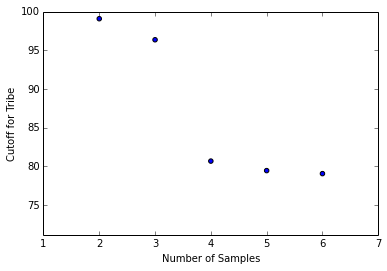

In [5]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'ANI_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'ANI_out')
ANI.allWorstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'ANI_out', 'acI-B1')

So these six samples appear to be enough.

### Coverage Cutoff

We likewise need enough samples to ensure that our estimate of the coverage cutoff isn't changing. Let's examine the cutoffs:

In [6]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir, 'COV_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'COV_out')

,Samples,Num Samples,Max,Min
Iluma-A2,[AAA027E14],1,100.01,100.01
Iluma-B1,[AAA027L17],1,101.72,101.72
Iluma-B2,[AAA028K15],1,102.41,102.41
Luna1-A2,[AAA028P02],1,100.38,100.38
acI-A1,"[AAA027M14, AAA278O22]",2,100.66,22.69
acI-A5,"[AAA028G02, AAA044O16]",2,101.07,52.23
acI-A6,"[AAA028E20, AAA028I14]",2,105.56,16.34
acI-A7,"[AAA023J06, AAA024D14, AAA041L13, AAA044N04]",4,105.08,35.85
acI-B1,"[AAA023D18, AAA027J17, AAA027L06, AAA028A23, A...",6,109.56,18.96
acI-B4,[AAA044D11],1,100.12,100.12


These results indicate a cutoff of 16.34% cutoff, from the acI-A6 tribe. The acI-B1 tribe is not far behind, with an 18.96% cutoff. The metadata indicate that one acI-A6 SAG is estimated to be 14% complete. This may contribute to the low coverage value. Among the acI-B1 genomes, again one genome is estimated to be 14% complete.

However, genomes from the tribes acI-A1 and acI-A7 are predicted to be even more complete, so completeness alone cannot explain low coverage. Likely it is due to a combination of completeness and varying levels of diversity within each tribe.

Just for fun let's look at the expected completeness cutoff for different numbers of acI-B1 samples.

Sampling tribe acI-B1 with sample size 2.
The worst-case minimum is: 86.92
Sampling tribe acI-B1 with sample size 3.
The worst-case minimum is: 68.6
Sampling tribe acI-B1 with sample size 4.
The worst-case minimum is: 25.49
Sampling tribe acI-B1 with sample size 5.
The worst-case minimum is: 22.87
Sampling tribe acI-B1 with sample size 6.
The worst-case minimum is: 18.96


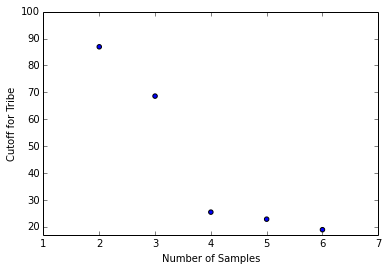

In [7]:
[pairwiseANI, taxonClass, tribes] = ANI.importANIandTaxonomy(externalDataDir,'COV_out', 'taxonomySAGs.csv')
ANI.sameTribePairwiseANI(externalDataDir,pairwiseANI, taxonClass, tribes, 'COV_out')
ANI.allWorstCaseANI(externalDataDir, pairwiseANI, taxonClass, tribes, 'COV_out', 'acI-B1')

Within this tribe, the coverage cutoff has a noticable drop at 4 samples, and does not change much as more samples get added. Our lowest cutoff comes from the acI-A6 tribe, with just two samples, so additional SAGs from that tribe might be helpful.